## Assignment 1

**Submission deadlines:**
- get at least **2** points by Tuesday, 11.03.2025
- remaining points: last lab session before or on Tuesday, 18.03.2025

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and answers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure `torch`.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$.

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$



#### 1a) Definition of Softmax Function

The softmax function is defined as:
$$
\hat{y}_i = \frac{e^{z_i}}{\sum_{j=1}^k e^{z_j}}
$$

where:
 $$ \boldsymbol{z} = [z_1, z_2, \dots, z_k] \space \text{is a vector of inputs} $$ and
 $$ \hat{\boldsymbol{y}} = [\hat{y}_1, \hat{y}_2, \dots, \hat{y}_k] \space  \text{ is the output probability vector} $$

#### 1b) Derivative of $ \hat{y}_i $ with Respect to $ z_j $

To compute $ \frac{\partial \hat{y}_i}{\partial z_j} $, let's differentiate the softmax function:

$$
\hat{y}_i = \frac{e^{z_i}}{\sum_{j=1}^k e^{z_j}}
$$

### 1c) Case 1: $ i = j $

When differentiating with respect to $ z_i $:

$$
\frac{\partial \hat{y}_i}{\partial z_i} = \frac{e^{z_i} \sum_{j=1}^k e^{z_j} - e^{z_i} e^{z_i}}{\left(\sum_{j=1}^k e^{z_j}\right)^2}
$$

Simplifying:

$$
\frac{\partial \hat{y}_i}{\partial z_i} = \hat{y}_i \left(1 - \hat{y}_i\right)
$$

### 1d) Case 2: $i \neq j$

When differentiating with respect to $ z_j $ for $ i \neq j $:

$$
\frac{\partial \hat{y}_i}{\partial z_j} = \frac{-e^{z_i} e^{z_j}}{\left(\sum_{k=1}^k e^{z_k}\right)^2}
$$

This can be rewritten as:

$$
\frac{\partial \hat{y}_i}{\partial z_j} = -\hat{y}_i \hat{y}_j
$$

### 1e) Matrix Form of $ \frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{z}} $

Combining the results:

$$
\frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{z}} =
\begin{cases}
\hat{y}_i (1 - \hat{y}_i) & \text{for } i = j \\
-\hat{y}_i \hat{y}_j & \text{for } i \neq j
\end{cases}
$$

This can be compactly represented as:

$$
\frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{z}} = \text{diag}(\hat{\boldsymbol{y}}) - \hat{\boldsymbol{y}} \hat{\boldsymbol{y}}^T
$$

Where:
- $\text{diag}(\hat{\boldsymbol{y}}) $ is a diagonal matrix with $ \hat{y}_i $ on the diagonal.
- $ \hat{\boldsymbol{y}} \hat{\boldsymbol{y}}^T $ is an outer product matrix.


$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$
\frac{\partial \hat{\boldsymbol{y}}}{\partial W_{ij}} = \frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{z}} \cdot \frac{\partial \boldsymbol{z}}{\partial W_{ij}}
$$

$$
\frac{\partial \hat{\boldsymbol{y}}}{\partial W_{ij}} = \left( \hat{y}_i(1 - \hat{y}_i) - \hat{y}_i \hat{y}_j \right) \cdot x_j
$$


$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

$$
\frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{b}} = \frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{z}} \cdot \frac{\partial \boldsymbol{z}}{\partial \boldsymbol{b}}
$$

$$
\frac{\partial \hat{\boldsymbol{y}}}{\partial \boldsymbol{b}} = \text{diag}(\hat{\boldsymbol{y}}) - \hat{\boldsymbol{y}} \hat{\boldsymbol{y}}^T
$$



# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import torch

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

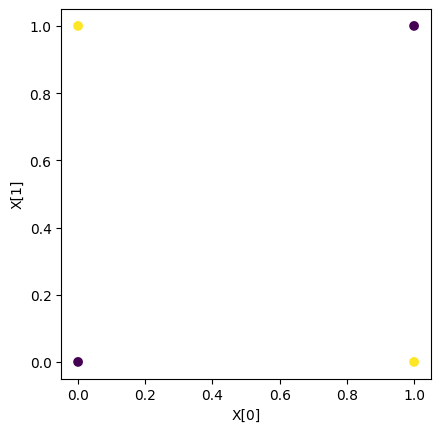

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=torch.float64)
# Y is a matrix of N numners - answers
Y = torch.tensor([[0], [1], [1], [0],], dtype=torch.float64)


plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


class SmallNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float32):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = torch.randn(self.W1.shape, dtype=self.W1.dtype) * 0.5
        self.b1 = torch.randn(self.b1.shape, dtype=self.b1.dtype) * 0.5
        self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * 0.5
        self.b2 = torch.randn(self.b2.shape, dtype=self.b2.dtype) * 0.5

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X @ self.W1.T + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.T + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -Y * torch.log(O2) - (1 - Y) * torch.log(1 - O2)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * O1 * (1 - O1) ##  = dLoss/dO1 * dO1/dA1 = dLoss/dO1 * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O2, loss

\begin{align*}
\text{Loss}(Y, O2) &= - Y \log(O2) - (1 - Y) \log(1 - O2) \\
\frac{\partial \text{Loss}}{\partial O2} &= - \frac{Y}{O2} + \frac{1 - Y}{1 - O2} \\
\frac{\partial O2}{\partial A2} &= O2 \cdot (1 - O2) \\
\frac{\partial \text{Loss}}{\partial A2} &= \frac{\partial \text{Loss}}{\partial O2} \cdot \frac{\partial O2}{\partial A2} \\
\frac{\partial \text{Loss}}{\partial A2} &= -Y(1-O2)+(1-Y)O2=-Y+O2Y+O2-O2Y=O2-Y
\end{align*}




In [ ]:
# TODO Problem 1:
# Set the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=torch.float64)
net.W1 = torch.tensor([[20.0, 20.0], [-20.0, -20.0]], dtype=torch.float64)
net.b1 = torch.tensor([-10.0, 30.0], dtype=torch.float64)
net.W2 = torch.tensor([[20.0, 20.0]], dtype=torch.float64)
net.b2 = torch.tensor([-30.0], dtype=torch.float64)



#weight matrix:
#[20,20]
#[-20,-20]

#bias vector
# [-10,30]


#first line: 20x +20y -10 = 0 => y=1/2-x
#second line: -20x -20 y +30 = 0  => y=3/2-x

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large


predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 4.543910487654591e-05
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.999954519621495
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.999954519621495
XORnet(tensor([1., 1.], dtype=torch.float64)) = 4.543910487654591e-05


\[
\begin{aligned}
&\sigma(20 \cdot 0 + 20 \cdot 0 - 10) \approx 0 \quad &\sigma(-20 \cdot 0 - 20 \cdot 0 + 30) \approx 1 \quad &\sigma(20 \cdot 0 + 20 \cdot 1 - 30) \approx 0 \\
&\sigma(20 \cdot 1 + 20 \cdot 1 - 10) \approx 1 \quad &\sigma(-20 \cdot 1 - 20 \cdot 1 + 30) \approx 0 \quad &\sigma(20 \cdot 1 + 20 \cdot 0 - 30) \approx 0 \\
&\sigma(20 \cdot 0 + 20 \cdot 1 - 10) \approx 1 \quad &\sigma(-20 \cdot 0 - 20 \cdot 1 + 30) \approx 1 \quad &\sigma(20 \cdot 1 + 20 \cdot 1 - 30) \approx 1 \\
&\sigma(20 \cdot 1 + 20 \cdot 0 - 10) \approx 1 \quad &\sigma(-20 \cdot 1 - 20 \cdot 0 + 30) \approx 1 \quad &\sigma(20 \cdot 1 + 20 \cdot 1 - 30) \approx 1
\end{aligned}
\]


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = torch.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i].item()
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps) #derivative approx check
    assert torch.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=torch.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=torch.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        grad = getattr(net, param_name + "_grad")
        param[:] = param - alpha * grad  # Update parameters with gradient descent

after 0 steps 	loss=0.7016899066867248
after 5000 steps 	loss=0.049807699160981656
after 10000 steps 	loss=0.011078852301853796
after 15000 steps 	loss=0.005857475380271677
after 20000 steps 	loss=0.00391221642297882
after 25000 steps 	loss=0.0029129002847010834
after 30000 steps 	loss=0.002309233326825985
after 35000 steps 	loss=0.0019068925389352392
after 40000 steps 	loss=0.0016203928372648974
after 45000 steps 	loss=0.0014064358326156946
after 50000 steps 	loss=0.0012408131357625769
after 55000 steps 	loss=0.0011089593027027401
after 60000 steps 	loss=0.0010015991123267687
after 65000 steps 	loss=0.0009125527758983964
after 70000 steps 	loss=0.0008375479358825632
after 75000 steps 	loss=0.000773538686677613
after 80000 steps 	loss=0.0007182962955877917
after 85000 steps 	loss=0.000670153225542718
after 90000 steps 	loss=0.000627837504690063
after 95000 steps 	loss=0.0005903623635939178


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.0004863988318024002
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.9996378139775108
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.9992448197421481
XORnet(tensor([1., 1.], dtype=torch.float64)) = 0.0006233744456113561


In [ ]:
X3 = torch.tensor([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
], dtype=torch.float64)

Y3 = torch.tensor([
    [0],
    [1],
    [1],
    [0],
    [1],
    [0],
    [0],
    [1]
], dtype=torch.float64)


net = SmallNet(3, 10, dtype=torch.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        grad = getattr(net, param_name + "_grad")
        param[:] = param - alpha * grad  # Update parameters with gradient descent

after 0 steps 	loss=1.0597320872065574
after 5000 steps 	loss=0.09500148542956201
after 10000 steps 	loss=0.013634167063971452
after 15000 steps 	loss=0.0064897893757311365
after 20000 steps 	loss=0.004133286020244554
after 25000 steps 	loss=0.0029947476489530847
after 30000 steps 	loss=0.002332597964235277
after 35000 steps 	loss=0.0019026624187119575
after 40000 steps 	loss=0.0016023421553867814
after 45000 steps 	loss=0.0013813583377863408
after 50000 steps 	loss=0.0012122982945646774
after 55000 steps 	loss=0.0010789943930847473
after 60000 steps 	loss=0.0009713173501840802
after 65000 steps 	loss=0.0008826093566950714
after 70000 steps 	loss=0.0008083203399120762
after 75000 steps 	loss=0.0007452384585619555
after 80000 steps 	loss=0.0006910338225422242
after 85000 steps 	loss=0.0006439764504502296
after 90000 steps 	loss=0.0006027556473375288
after 95000 steps 	loss=0.0005663607494439239


In [ ]:
predictions, loss = net.forward(X3, Y3, do_backward=True)
for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.0005112043450443523
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.9994413901044121
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.9994191731717995
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.0004641389060751658
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.9993894992095673
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.0004750446919189692
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.0007252050697675595
XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.999654713695436


In [ ]:
# Function to train the network and estimate success rate
def train_network(hidden_dim, num_retries=10, learning_rate=0.1, epochs=10000, success_threshold=0.1):
    success_count = 0
    for _ in range(num_retries):
        net = SmallNet(3, hidden_dim, dtype=torch.float64)
        for epoch in range(epochs):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net, param_name)
                grad = getattr(net, param_name + "_grad")
                param[:] = param - learning_rate * grad

        predictions, _ = net.forward(X3)
        predicted_classes = (predictions > 0.5).double()
        if torch.equal(predicted_classes, Y3):
            success_count += 1

    return success_count / num_retries

# Run experiments for different hidden dimensions
for hidden_dim in [2, 3, 5, 10, 20]:
    success_rate = train_network(hidden_dim)
    print(f"Hidden size {hidden_dim}: success rate = {success_rate:.2f}")


Hidden size 2: success rate = 0.00
Hidden size 3: success rate = 0.40
Hidden size 5: success rate = 0.20
Hidden size 10: success rate = 0.90
Hidden size 20: success rate = 1.00


- What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times) = 3
- What is the minimal hidden size required to reliably solve 3D XOR = 20
- Which networks are easier to train - small or large ones? Why? Larger networks are generally easier to train because they have more capacity to model complex relationships, though they come with the risk of overfitting and increased computational cost.

## Problem 4


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SmallNetWithReLU:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float32):
        self.W1 = torch.randn(num_hidden, in_features, dtype=dtype)
        self.b1 = torch.zeros(num_hidden, dtype=dtype)
        self.W2 = torch.randn(1, num_hidden, dtype=dtype)
        self.b2 = torch.zeros(1, dtype=dtype)

    def forward(self, X, Y=None, do_backward=False):
        A1 = X @ self.W1.T + self.b1
        O1 = F.relu(A1)
        A2 = O1 @ self.W2.T + self.b2
        O2 = torch.sigmoid(A2)

        if Y is not None:
            loss = - (Y * torch.log(O2) + (1 - Y) * torch.log(1 - O2))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * (O1 > 0).float() ##  = dLoss/dO1 * dO1/dA1 = dLoss/dO1 * (O1 > 0).float() ;; (O1 > 0).float() = derivative of relu
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O2, loss

X3 = torch.tensor([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
], dtype=torch.float64)

Y3 = torch.tensor([
    [0],
    [1],
    [1],
    [0],
    [1],
    [0],
    [0],
    [1]
], dtype=torch.float64)

net = SmallNetWithReLU(3, 10, dtype=torch.float64)

alpha = 0.05

for epoch in range(10000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (epoch % 500) == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        param_grad = getattr(net, param_name + "_grad")
        param[:] -= alpha * param_grad

with torch.no_grad():
    predictions, _ = net.forward(X3)
    print("Predictions after training:")
    print(predictions)


Epoch 0, Loss: 1.126103313941369
Epoch 500, Loss: 0.5948494451744374
Epoch 1000, Loss: 0.5281680124626815
Epoch 1500, Loss: 0.4026048755872965
Epoch 2000, Loss: 0.1824472486801365
Epoch 2500, Loss: 0.09245830430098853
Epoch 3000, Loss: 0.05399786613089863
Epoch 3500, Loss: 0.03570538126828205
Epoch 4000, Loss: 0.025649254718861238
Epoch 4500, Loss: 0.01958938489405761
Epoch 5000, Loss: 0.0156479101082528
Epoch 5500, Loss: 0.012913251833509849
Epoch 6000, Loss: 0.010921890903937172
Epoch 6500, Loss: 0.009414187461136037
Epoch 7000, Loss: 0.008235234773471361
Epoch 7500, Loss: 0.007293899155581474
Epoch 8000, Loss: 0.006531088575867538
Epoch 8500, Loss: 0.005901163375633274
Epoch 9000, Loss: 0.005367618246049607
Epoch 9500, Loss: 0.0049178669341589515
Predictions after training:
tensor([[0.0033],
        [0.9975],
        [0.9943],
        [0.0048],
        [0.9962],
        [0.0031],
        [0.0070],
        [0.9940]], dtype=torch.float64)


## Problem 5

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TwoLayerNetWithSigmoid:
    def __init__(self, in_features: int, hidden_dim: int, dtype=torch.float32):
        self.W1 = torch.randn(hidden_dim, in_features, dtype=dtype)
        self.b1 = torch.zeros(hidden_dim, dtype=dtype)
        self.W2 = torch.randn(hidden_dim, hidden_dim, dtype=dtype)
        self.b2 = torch.zeros(hidden_dim, dtype=dtype)
        self.W3 = torch.randn(1, hidden_dim, dtype=dtype)
        self.b3 = torch.zeros(1, dtype=dtype)

    def forward(self, X, Y=None, do_backward=False):
        A1 = X @ self.W1.T + self.b1
        O1 = torch.sigmoid(A1)
        A2 = O1 @ self.W2.T + self.b2
        O2 = torch.sigmoid(A2)
        A3 = O2 @ self.W3.T + self.b3
        O3 = torch.sigmoid(A3)

        if Y is not None:
            loss = - (Y * torch.log(O3) + (1 - Y) * torch.log(1 - O3))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A3_grad = (O3 - Y) / X.shape[0]
            self.b3_grad = A3_grad.sum(0)
            self.W3_grad = A3_grad.T @ O2
            O2_grad = A3_grad @ self.W3
            A2_grad = O2_grad * O2 * (1 - O2)
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O3, loss

X3 = torch.tensor([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
], dtype=torch.float64)

Y3 = torch.tensor([
    [0],
    [1],
    [1],
    [0],
    [1],
    [0],
    [0],
    [1]
], dtype=torch.float64)

def train_network(hidden_dim, epochs=10000, alpha=0.05):
    net = TwoLayerNetWithSigmoid(in_features=3, hidden_dim=hidden_dim, dtype=torch.float64)

    for epoch in range(epochs):
        predictions, loss = net.forward(X3, Y3, do_backward=True)

        if (epoch % 500) == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

        with torch.no_grad():
            for param, grad in zip([net.W1, net.b1, net.W2, net.b2, net.W3, net.b3],
                                   [net.W1_grad, net.b1_grad, net.W2_grad, net.b2_grad, net.W3_grad, net.b3_grad]):
                param.data -= alpha * grad

    with torch.no_grad():
        predictions, _ = net.forward(X3)
        print("\nPredictions after training:")
        print(predictions)

hidden_dim = 10
print("\nTraining network with 2 hidden layers (10 neurons in each hidden layer)")
train_network(hidden_dim)



Training network with 2 hidden layers (10 neurons in each hidden layer)
Epoch 0, Loss: 0.6925363320747925
Epoch 500, Loss: 0.688595470561284
Epoch 1000, Loss: 0.6868544318863096
Epoch 1500, Loss: 0.6845683997017782
Epoch 2000, Loss: 0.6814136329129343
Epoch 2500, Loss: 0.676889590561436
Epoch 3000, Loss: 0.6701604500324086
Epoch 3500, Loss: 0.6597479856617344
Epoch 4000, Loss: 0.643005529977792
Epoch 4500, Loss: 0.6155310224418421
Epoch 5000, Loss: 0.5706460767078705
Epoch 5500, Loss: 0.4996451051921566
Epoch 6000, Loss: 0.3986721861782587
Epoch 6500, Loss: 0.28230322747908526
Epoch 7000, Loss: 0.1819794549419098
Epoch 7500, Loss: 0.11546386066612992
Epoch 8000, Loss: 0.07648271554776662
Epoch 8500, Loss: 0.053756007381134625
Epoch 9000, Loss: 0.039885724413054255
Epoch 9500, Loss: 0.030930860852991023

Predictions after training:
tensor([[0.0197],
        [0.9814],
        [0.9724],
        [0.0171],
        [0.9729],
        [0.0192],
        [0.0443],
        [0.9777]], dtype=torch

## Problem 6

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DeepNetWithSigmoid:
    def __init__(self, in_features: int, hidden_dim: int, num_hidden_layers: int, dtype=torch.float32):
        self.num_hidden_layers = num_hidden_layers
        self.weights = []
        self.biases = []

        self.weights.append(torch.randn(hidden_dim, in_features, dtype=dtype))
        self.biases.append(torch.zeros(hidden_dim, dtype=dtype))

        for _ in range(num_hidden_layers - 1):
            self.weights.append(torch.randn(hidden_dim, hidden_dim, dtype=dtype))
            self.biases.append(torch.zeros(hidden_dim, dtype=dtype))

        self.weights.append(torch.randn(1, hidden_dim, dtype=dtype))
        self.biases.append(torch.zeros(1, dtype=dtype))

    def forward(self, X, Y=None, do_backward=False):
        A = []
        O = [X]
        for i in range(self.num_hidden_layers):
            A.append(O[-1] @ self.weights[i].T + self.biases[i])
            O.append(torch.sigmoid(A[-1]))

        A.append(O[-1] @ self.weights[-1].T + self.biases[-1])
        O.append(torch.sigmoid(A[-1]))

        if Y is not None:
            loss = - (Y * torch.log(O[-1]) + (1 - Y) * torch.log(1 - O[-1]))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A_grad = [None] * (self.num_hidden_layers + 1)
            W_grad = [None] * (self.num_hidden_layers + 1)
            b_grad = [None] * (self.num_hidden_layers + 1)

            A_grad[-1] = (O[-1] - Y) / X.shape[0]
            for i in reversed(range(self.num_hidden_layers + 1)):
                W_grad[i] = A_grad[i].T @ O[i]
                b_grad[i] = A_grad[i].sum(0)
                if i > 0:
                    O_grad = A_grad[i] @ self.weights[i]
                    A_grad[i - 1] = O_grad * O[i] * (1 - O[i])

            self.W_grad = W_grad
            self.b_grad = b_grad

        return O[-1], loss

X3 = torch.tensor([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
], dtype=torch.float32)

Y3 = torch.tensor([
    [0],
    [1],
    [1],
    [0],
    [1],
    [0],
    [0],
    [1]
], dtype=torch.float32)

def train_network(hidden_dim, num_hidden_layers, epochs=10000, alpha=0.05):
    net = DeepNetWithSigmoid(in_features=3, hidden_dim=hidden_dim, num_hidden_layers=num_hidden_layers, dtype=torch.float32)

    for epoch in range(epochs):
        predictions, loss = net.forward(X3, Y3, do_backward=True)

        if (epoch % 500) == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

        with torch.no_grad():
            for i in range(len(net.weights)):
                net.weights[i] -= alpha * net.W_grad[i]
                net.biases[i] -= alpha * net.b_grad[i]

    with torch.no_grad():
        predictions, _ = net.forward(X3)
        print("\nPredictions after training:")
        print(predictions)

hidden_dim = 10
num_hidden_layers = 3
print("\nTraining network with 3 hidden layers (10 neurons in each hidden layer)")
train_network(hidden_dim, num_hidden_layers)


hidden_dim = 5
num_hidden_layers = 2
print("\nTraining network with 2 hidden layers (5 neurons in each hidden layer)")
train_network(hidden_dim, num_hidden_layers, alpha=0.1)



Training network with 3 hidden layers (10 neurons in each hidden layer)
Epoch 0, Loss: 0.7228370904922485
Epoch 500, Loss: 0.6941176056861877
Epoch 1000, Loss: 0.6911745071411133
Epoch 1500, Loss: 0.6882231831550598
Epoch 2000, Loss: 0.6840925216674805
Epoch 2500, Loss: 0.6774453520774841
Epoch 3000, Loss: 0.6651928424835205
Epoch 3500, Loss: 0.6383246779441833
Epoch 4000, Loss: 0.5739147067070007
Epoch 4500, Loss: 0.46342307329177856
Epoch 5000, Loss: 0.3717484474182129
Epoch 5500, Loss: 0.30958762764930725
Epoch 6000, Loss: 0.24275875091552734
Epoch 6500, Loss: 0.16244901716709137
Epoch 7000, Loss: 0.09893820434808731
Epoch 7500, Loss: 0.06224633380770683
Epoch 8000, Loss: 0.042310893535614014
Epoch 8500, Loss: 0.030890919268131256
Epoch 9000, Loss: 0.023826543241739273
Epoch 9500, Loss: 0.01914609596133232

Predictions after training:
tensor([[0.0118],
        [0.9805],
        [0.9890],
        [0.0090],
        [0.9767],
        [0.0290],
        [0.0115],
        [0.9894]])

Tra

## Problem 7

solution above, at the beginning of the notebook